In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

              Price          Age             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                CC        Doors  Cylinders        Gears      Weight  \
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000   
mean    1576.85585     4.033426        4.0     5.026462  1072.45961   
std      424.38677     0.952677        0.0     0.188510    52.64112   
min     1300.00000    

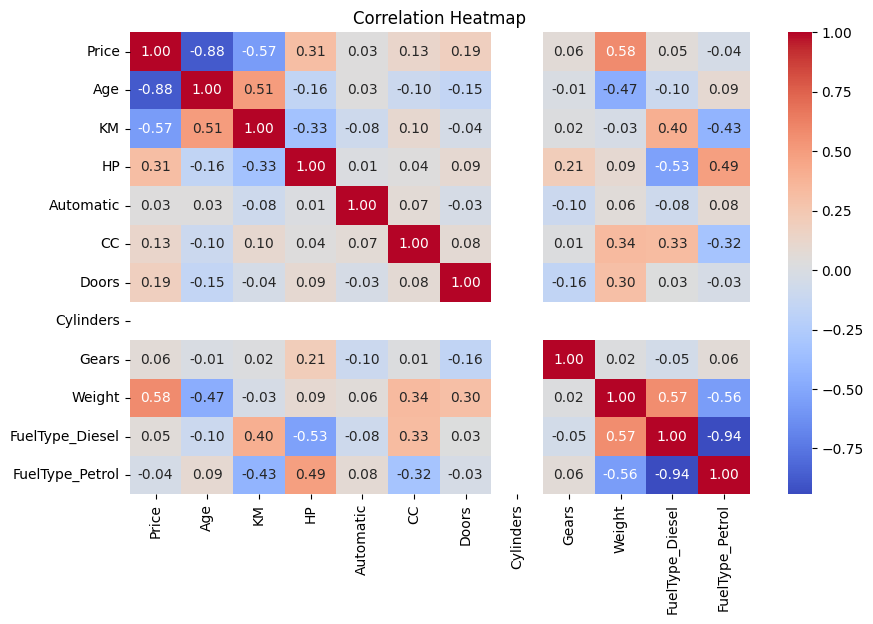

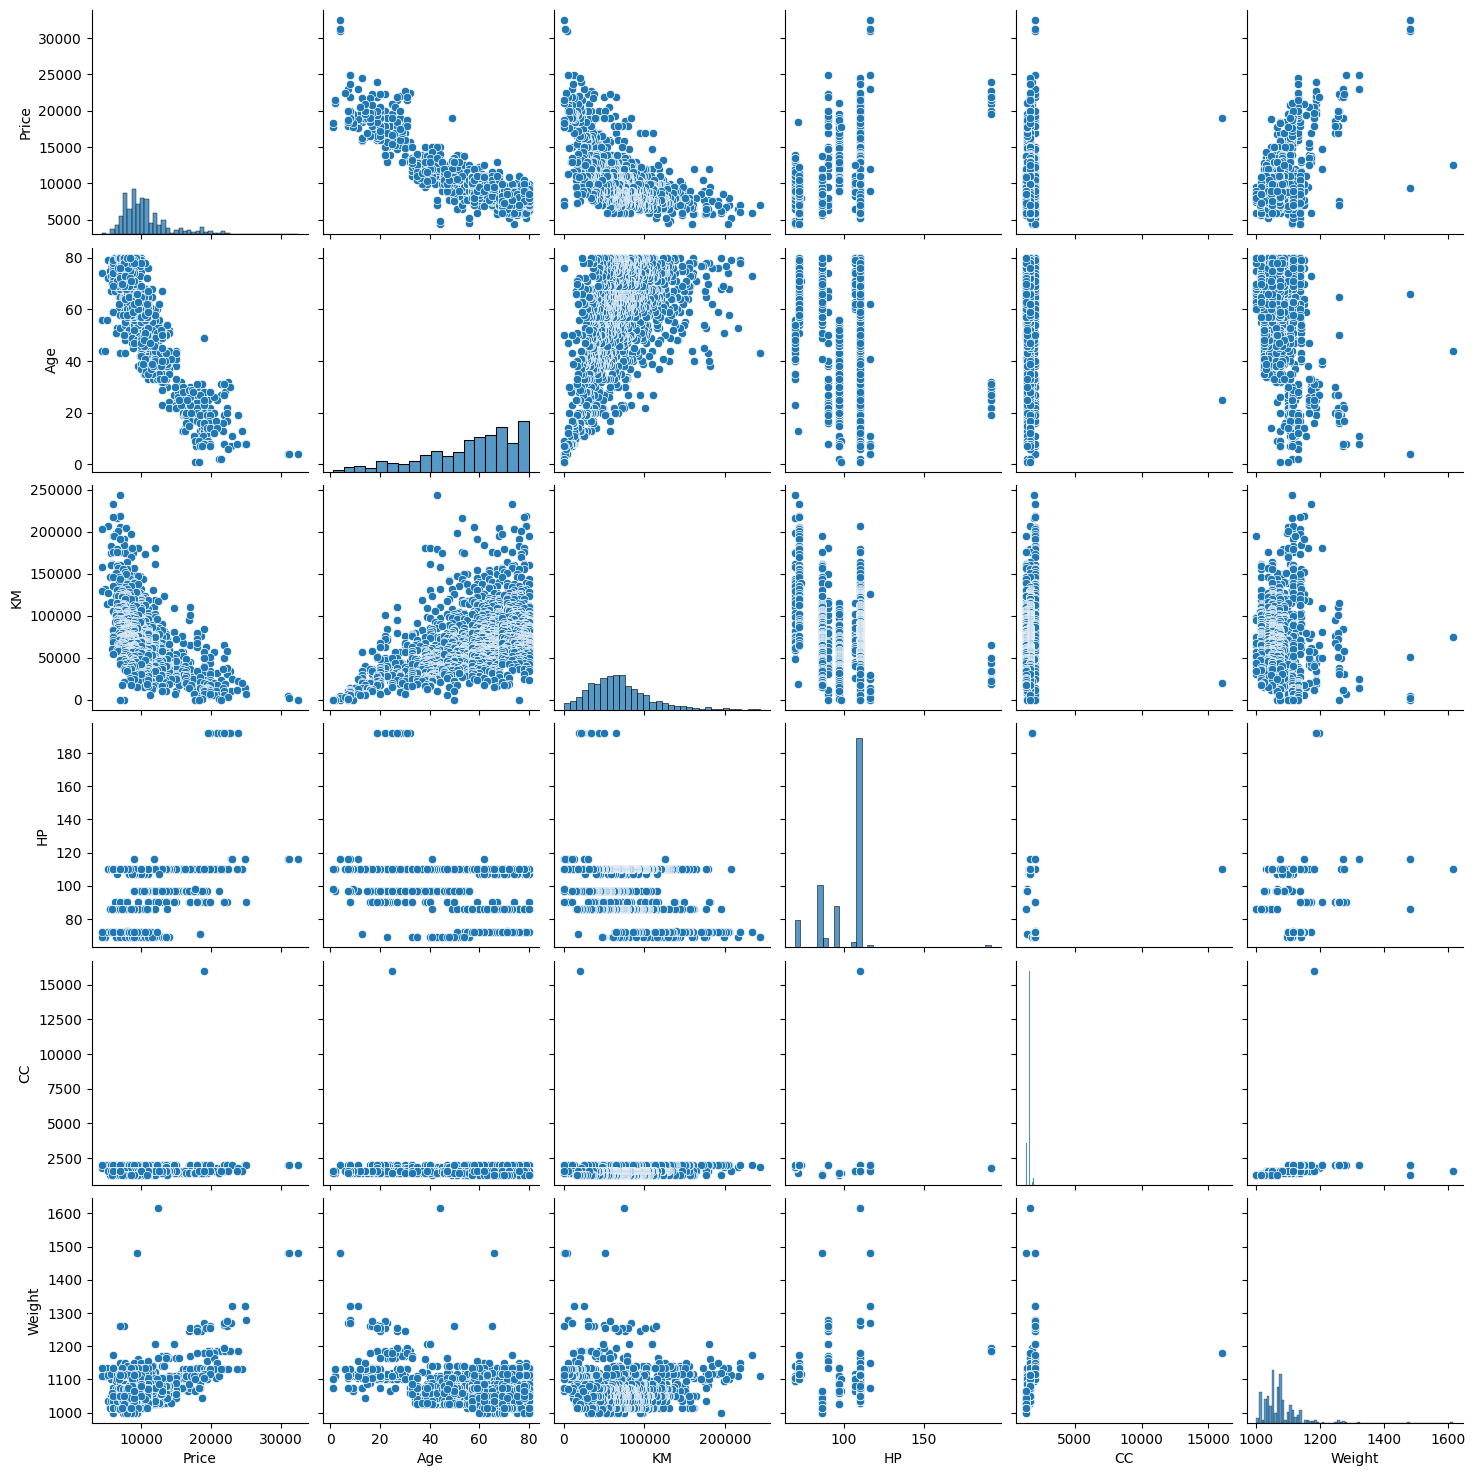

Linear Regression Model:
R-squared: 0.8332952678447362
RMSE: 1491.4107550884653
-
Ridge Regression Model:
R-squared: 0.8334510014965116
RMSE: 1490.713962892294
-
Lasso Regression Model:
R-squared: 0.8332913629213372
RMSE: 1491.428222530977
-
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     842.1
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:04:30   Log-Likelihood:                -9866.8
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1138   BIC:                         1.980e+04
Df Model:                           9                                         
Covariance Type:            nonrobust          

In [ ]:
df = pd.read_csv("/content/sample_data/ToyotaCorolla - MLR.csv")
df.rename(columns={'Age_08_04': 'Age', 'Fuel_Type': 'FuelType', 'cc': 'CC'}, inplace=True)

ohe = OneHotEncoder(drop='first', sparse_output=False)
fuel_encoded = ohe.fit_transform(df[['FuelType']])
fuel_df = pd.DataFrame(fuel_encoded, columns=ohe.get_feature_names_out(['FuelType']))
df = pd.concat([df, fuel_df], axis=1)
df.drop(columns=['FuelType'], inplace=True)

# EDA
print(df.describe())
print(df.info())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']])
plt.show()
X = df[['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight'] + list(fuel_df.columns)]
y = df['Price']

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build minimum of 3 different models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Model:")
    print("R-squared:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("-")

X_train_sm = sm.add_constant(X_train)
olsm = sm.OLS(y_train, X_train_sm).fit()
print(olsm.summary())


####1.What is Normalization & Standardization and how is it helpful?
Normalization and standardization are techniques used to scale numerical data for better model performance. Normalization transforms data into a fixed range, typically [0,1], using Min-Max Scaling, while standardization converts data to have a mean of zero and a standard deviation of one using Z-score transformation. These techniques are particularly useful for models sensitive to feature scales, such as linear regression, KNN, and gradient-based algorithms.

####2.What techniques can be used to address multicollinearity in multiple linear regression?
To address multicollinearity in multiple linear regression, one can remove highly correlated features, use Variance Inflation Factor (VIF) to detect problematic variables, apply Principal Component Analysis (PCA) to transform correlated features into uncorrelated ones, or use Ridge Regression, which applies regularization to reduce the impact of multicollinearity by penalizing large coefficients.